<a href="https://colab.research.google.com/github/FrancoPalavicinoG/cellia/blob/main/notebooks/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup Kaggle API

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Download NHANES dataset from Kaggle

In [ ]:
!kaggle datasets download -d cdc/national-health-and-nutrition-examination-survey
!unzip -o national-health-and-nutrition-examination-survey.zip -d nhanes

### NHANES dataset into pandas DF

Import libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Create Dataframes

In [6]:
df_demo = pd.read_csv("nhanes/demographic.csv")
df_diet = pd.read_csv("nhanes/diet.csv")
df_exam = pd.read_csv("nhanes/examination.csv")
df_lab = pd.read_csv("nhanes/labs.csv")
df_medi = pd.read_csv("nhanes/medications.csv", encoding="latin-1")
df_quest = pd.read_csv("nhanes/questionnaire.csv")

In [7]:
dfs = {
    "Demographic": df_demo,
    "Diet": df_diet,
    "Examination": df_exam,
    "Labs": df_lab,
    "Medications": df_medi,
    "Questionnaire": df_quest
}

### Basic EDA

In [8]:
def basic_eda(df, name, n=3):
    print(f"\n===== {name} =====")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print("\nData type:")
    print(df.dtypes.value_counts())
    print("\nNull per column (top 5):")
    print(df.isna().sum().sort_values(ascending=False).head())
    print("\nCount all nulls")
    print(df.isnull().sum().sum())
    print("\nData examples:")
    display(df.head(n))


In [9]:
for name, df in dfs.items():
    basic_eda(df, name)


===== Demographic =====
Shape: (10175, 47)
Columns: ['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR']

Data type:
float64    28
int64      19
Name: count, dtype: int64

Null per column (top 5):
DMQADFC     9632
RIDAGEMN    9502
RIDEXPRG    8866
DMDYRSUS    8267
DMDEDUC3    7372
dtype: int64

Count all nulls
82092

Data examples:


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51



===== Diet =====
Shape: (9813, 168)
Columns: ['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP', 'DR1HELPD', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DR1STY', 'DR1SKY', 'DRQSDIET', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060', 'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS1

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



===== Examination =====
Shape: (9813, 224)
Columns: ['SEQN', 'PEASCST1', 'PEASCTM1', 'PEASCCT1', 'BPXCHR', 'BPAARM', 'BPACSZ', 'BPXPLS', 'BPXPULS', 'BPXPTY', 'BPXML1', 'BPXSY1', 'BPXDI1', 'BPAEN1', 'BPXSY2', 'BPXDI2', 'BPAEN2', 'BPXSY3', 'BPXDI3', 'BPAEN3', 'BPXSY4', 'BPXDI4', 'BPAEN4', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMDBMIC', 'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXSAD1', 'BMXSAD2', 'BMXSAD3', 'BMXSAD4', 'BMDAVSAD', 'BMDSADCM', 'MGDEXSTS', 'MGD050', 'MGD060', 'MGQ070', 'MGQ080', 'MGQ090', 'MGQ100', 'MGQ110', 'MGQ120', 'MGD130', 'MGQ90DG', 'MGDSEAT', 'MGAPHAND', 'MGATHAND', 'MGXH1T1', 'MGXH1T1E', 'MGXH2T1', 'MGXH2T1E', 'MGXH1T2', 'MGXH1T2E', 'MGXH2T2', 'MGXH2T2E', 'MGXH1T3', 'MGXH1T3E', 'MGXH2T3', 'MGXH2T3E', 'MGDCGSZ', 'OHDEXSTS', 'OHDDESTS', 'OHXIMP', 'OHX01TC', 'OHX02TC', 'OHX03TC', 'OHX04TC', 'OHX05TC', 'OHX06TC', 'OHX07TC', 'OHX08TC', 'OHX09TC', 'OHX10TC',

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0



===== Labs =====
Shape: (9813, 424)
Columns: ['SEQN', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT', 'WTSAF2YR.x', 'LBXAPB', 'LBDAPBSI', 'LBXSAL', 'LBDSALSI', 'LBXSAPSI', 'LBXSASSI', 'LBXSATSI', 'LBXSBU', 'LBDSBUSI', 'LBXSC3SI', 'LBXSCA', 'LBDSCASI', 'LBXSCH', 'LBDSCHSI', 'LBXSCK', 'LBXSCLSI', 'LBXSCR', 'LBDSCRSI', 'LBXSGB', 'LBDSGBSI', 'LBXSGL', 'LBDSGLSI', 'LBXSGTSI', 'LBXSIR', 'LBDSIRSI', 'LBXSKSI', 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBDSTBSI', 'LBXSTP', 'LBDSTPSI', 'LBXSTR', 'LBDSTRSI', 'LBXSUA', 'LBDSUASI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'URXUCL', 'WTSA2YR.x', 'LBXSCU', 'LBDSCUSI', 'LBXSSE', 'LBDSSESI', 'LBXSZN', 'LBDSZNSI', 'URXUCR.y', 'WTSB2YR.x', 'URXBP3', 'URDBP3LC', 'URXBPH', 'URDBPHLC', 'URXBPF', 'URDBPFLC', 'URXBPS', 'URDBPSLC', 'URXTLC', 'URD

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2



===== Medications =====
Shape: (20194, 13)
Columns: ['SEQN', 'RXDUSE', 'RXDDRUG', 'RXDDRGID', 'RXQSEEN', 'RXDDAYS', 'RXDRSC1', 'RXDRSC2', 'RXDRSC3', 'RXDRSD1', 'RXDRSD2', 'RXDRSD3', 'RXDCOUNT']

Data type:
object     8
float64    3
int64      2
Name: count, dtype: int64

Null per column (top 5):
RXDRSC3    20067
RXDRSD3    20067
RXDRSD2    19480
RXDRSC2    19480
RXDRSD1     6561
dtype: int64

Count all nulls
122544

Data examples:


,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0



===== Questionnaire =====
Shape: (10175, 953)
Columns: ['SEQN', 'ACD011A', 'ACD011B', 'ACD011C', 'ACD040', 'ACD110', 'ALQ101', 'ALQ110', 'ALQ120Q', 'ALQ120U', 'ALQ130', 'ALQ141Q', 'ALQ141U', 'ALQ151', 'ALQ160', 'BPQ020', 'BPQ030', 'BPD035', 'BPQ040A', 'BPQ050A', 'BPQ056', 'BPD058', 'BPQ059', 'BPQ080', 'BPQ060', 'BPQ070', 'BPQ090D', 'BPQ100D', 'CBD070', 'CBD090', 'CBD110', 'CBD120', 'CBD130', 'HSD010', 'HSQ500', 'HSQ510', 'HSQ520', 'HSQ571', 'HSQ580', 'HSQ590', 'HSAQUEX', 'CSQ010', 'CSQ020', 'CSQ030', 'CSQ040', 'CSQ060', 'CSQ070', 'CSQ080', 'CSQ090A', 'CSQ090B', 'CSQ090C', 'CSQ090D', 'CSQ100', 'CSQ110', 'CSQ120A', 'CSQ120B', 'CSQ120C', 'CSQ120D', 'CSQ120E', 'CSQ120F', 'CSQ120G', 'CSQ120H', 'CSQ140', 'CSQ160', 'CSQ170', 'CSQ180', 'CSQ190', 'CSQ200', 'CSQ202', 'CSQ204', 'CSQ210', 'CSQ220', 'CSQ240', 'CSQ250', 'CSQ260', 'AUQ136', 'AUQ138', 'CDQ001', 'CDQ002', 'CDQ003', 'CDQ004', 'CDQ005', 'CDQ006', 'CDQ009A', 'CDQ009B', 'CDQ009C', 'CDQ009D', 'CDQ009E', 'CDQ009F', 'CDQ009G', 'CDQ009H', 'CD

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN


Plot the Top N columns with more null values

In [10]:
def plot_null_bars(df, name, max_cols=30):
    null_counts = df.isnull().sum().sort_values(ascending=False)
    null_counts = null_counts[:max_cols]  # limit columns
    plt.figure(figsize=(12,6))
    null_counts.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f"Count Null values - {name}", fontsize=14)
    plt.ylabel("Nulls")
    plt.xlabel("Columns")
    plt.xticks(rotation=45, ha='right')
    plt.show()

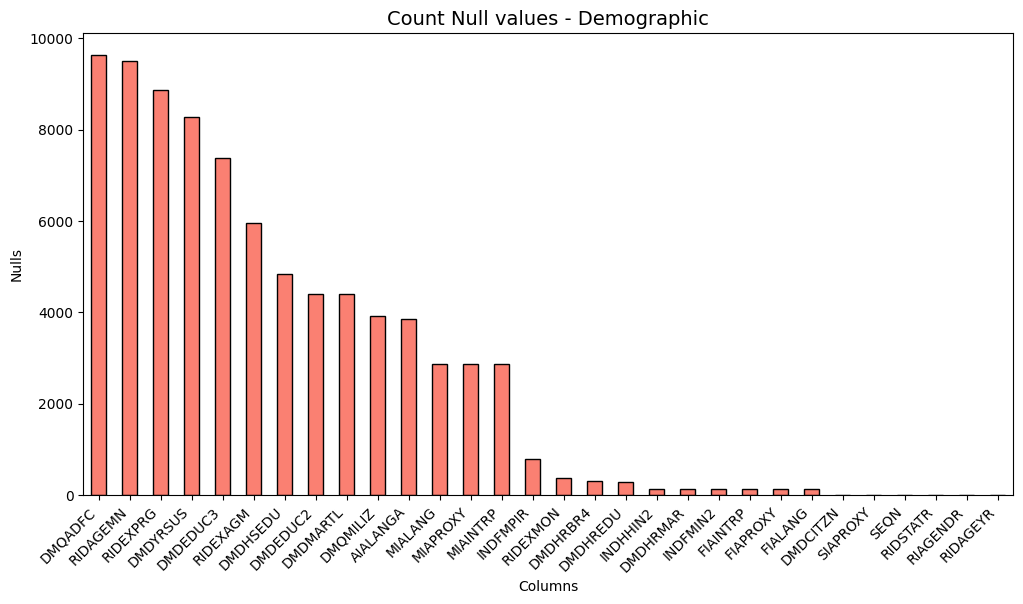

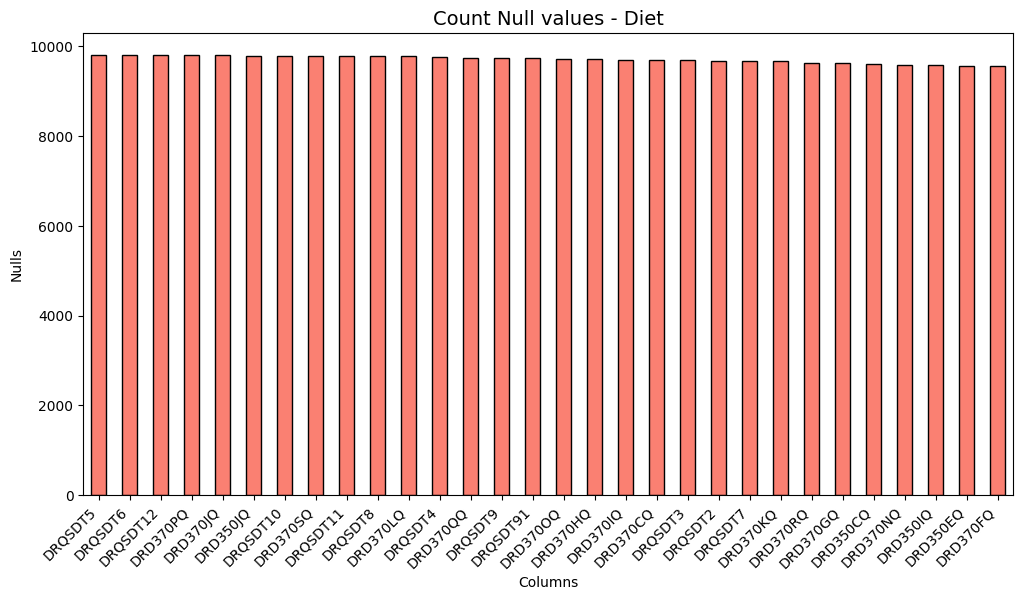

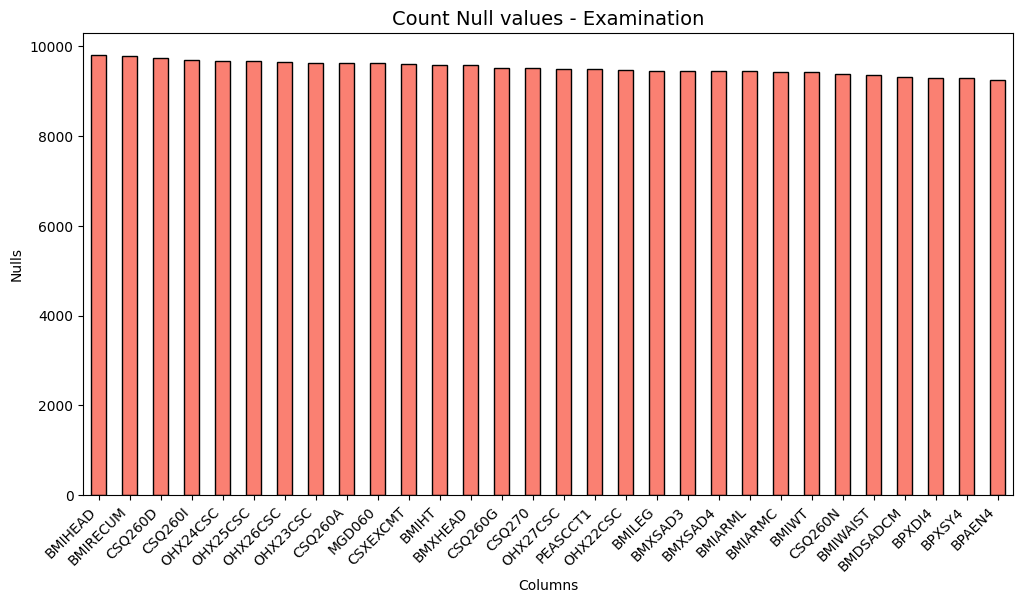

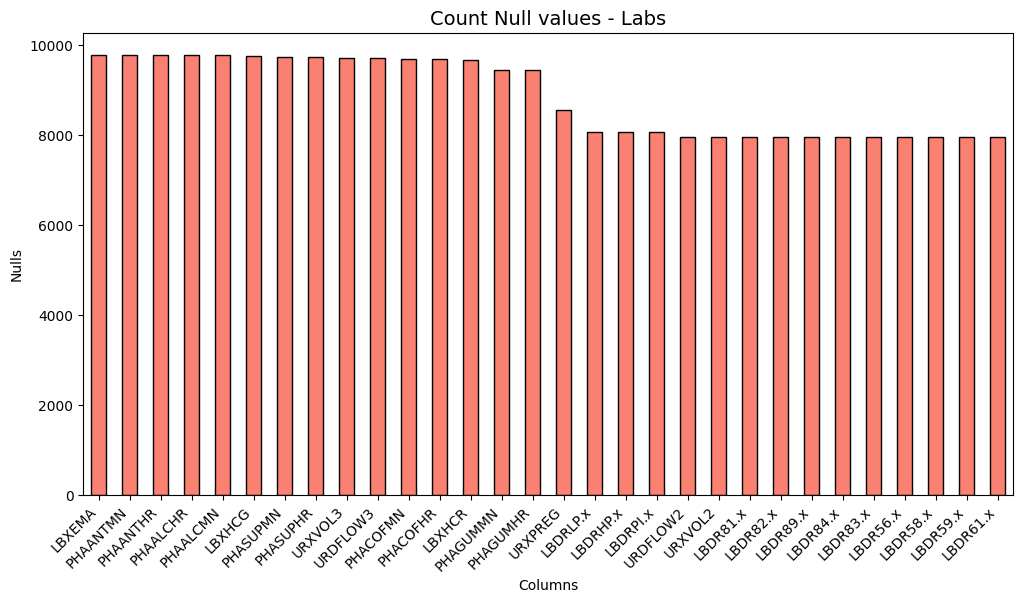

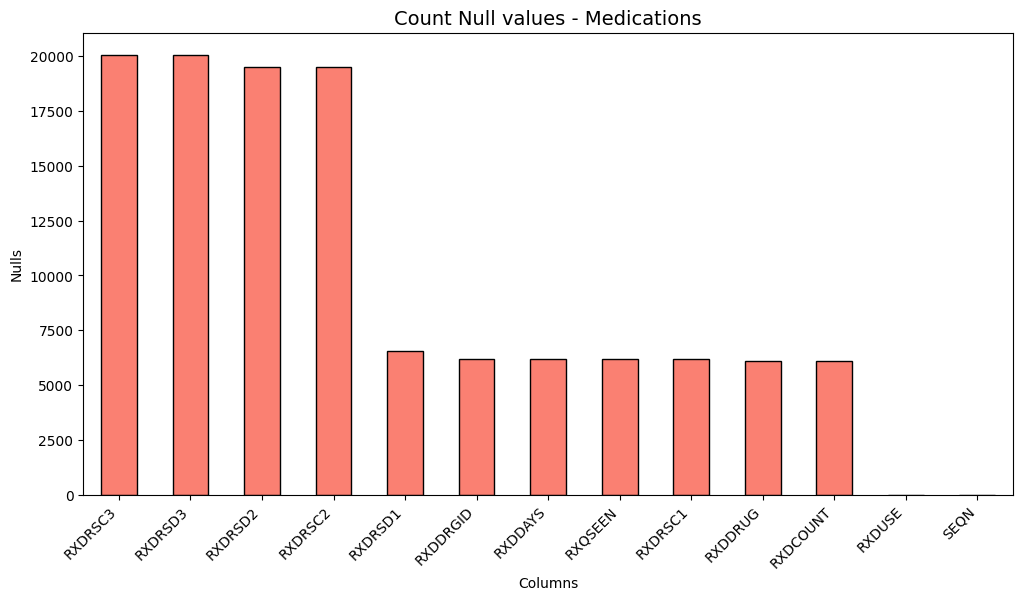

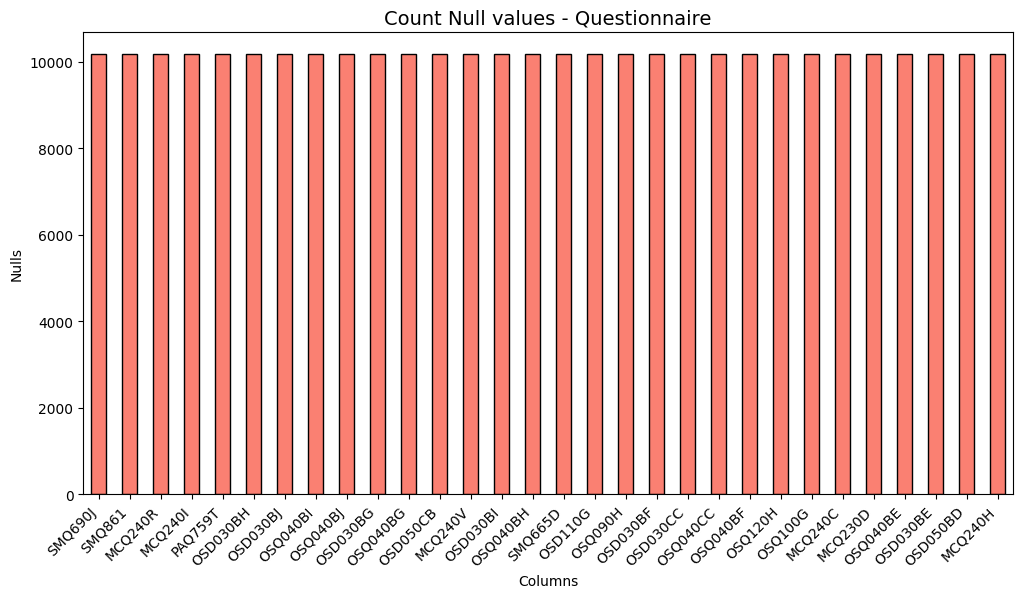

In [11]:
for name, df in dfs.items():
    plot_null_bars(df, name)

### SEQN: "Respondent Sequence Number”
- It is a unique identifier for each study participant.
- Each row in any NHANES file (biomarkers, questionnaires, diet, physical examination, etc.) can be joined to other tables using SEQN.
- It is used to link data from different sources without exposing personal information (name, address, etc.).


In [12]:
def count_seqn_duplicates(df, name,  seqn_col="SEQN"):
    total_seqn = df[seqn_col].nunique()
    total_rows = len(df)
    duplicated_seqn = df[seqn_col].duplicated().sum()

    print(f"\n===== {name} =====")
    print(f"Total rows: {total_rows}")
    print(f"Unique SEQN: {total_seqn}")
    print(f"Rows with duplicated SEQN: {duplicated_seqn}")

    dup_counts = df[seqn_col].value_counts()
    dup_counts = dup_counts[dup_counts > 1]

    if not dup_counts.empty:
        print("\n#Duplicated SEQN:")
        print(dup_counts)
    else:
        print("\nNo duplicates")

Count any duplicated user entries

In [13]:
for name, df in dfs.items():
    count_seqn_duplicates(df, name)


===== Demographic =====
Total rows: 10175
Unique SEQN: 10175
Rows with duplicated SEQN: 0

No duplicates

===== Diet =====
Total rows: 9813
Unique SEQN: 9813
Rows with duplicated SEQN: 0

No duplicates

===== Examination =====
Total rows: 9813
Unique SEQN: 9813
Rows with duplicated SEQN: 0

No duplicates

===== Labs =====
Total rows: 9813
Unique SEQN: 9813
Rows with duplicated SEQN: 0

No duplicates

===== Medications =====
Total rows: 20194
Unique SEQN: 10175
Rows with duplicated SEQN: 10019

#Duplicated SEQN:
SEQN
77111    23
79267    20
78043    20
80129    19
76688    19
         ..
75528     2
80381     2
73873     2
75855     2
73900     2
Name: count, Length: 2758, dtype: int64

===== Questionnaire =====
Total rows: 10175
Unique SEQN: 10175
Rows with duplicated SEQN: 0

No duplicates


### Basic biomarkers dictionary

In [14]:
demo_map = {
    "RIAGENDR": "GENDER", # Gender of the participant.
    "RIDAGEMN": "AGE_MONTHS_1", # Age in months of the participant at the time of screening. Reported for persons aged 24 months or younger at the time of exam (or screening if not examined).
    "RIDAGEYR": "AGE_YEARS", # Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age.
    "RIDEXAGM": "AGE_MONTHS_2", # Age in months of the participant at the time of examination. Reported for persons aged 19 years or younger at the time of examination.
}

exam_map = {
    "BMIWT": "WEIGHT_COMMENT", # Weight Comment
    "BMXBMI": "BODY_MASS_INDEX", # Body Mass Index (kg/m**2)
    "BMXHT": "HEIGHT", # Standing Height (cm)
    "BMXWT": "WIGHT", # Weight (kg)
}

lab_map = {
    "LBDTCSI": "TOTAL_CHOL_1",  # Total Cholesterol(mmol/L)
    "LBXTC": "TOTAL_CHOL_2", # Total Cholesterol(mg/dL)
    "LBDSCHSI": "CHOLESTEROL_1", # Cholesterol(mmol/L)
    "LBDSCRSI": "CREATININE_1", # Creatinine(umol/L)
    "LBDSTRSI": "TRIGLYCERIDES_R1", # Triglycerides, refrigerated (mmol/L)
    "LBXSCH": "CHOLESTEROL_2", # Cholesterol(mg/dL)
    "LBXSCR": "CREATININE_2", # Creatinine (mg/dL)
    "LBXSTR": "TRIGLYCERIDES_R2", # Triglycerides, refrigerated (mg/dL)
    "LBDLDLSI": "LDL_1", # LDL-cholesterol (mmol/L)
    "LBDLDL": "LDL_2", # LDL-cholesterol (mg/dL)
    "LBDTRSI": "TRIGLYCERIDE_1", # Triglyceride (mmol/L)
    "LBXTR": "TRIGLYCERIDE_2", # Triglyceride (mg/dL)
    "LBDHDDSI": "HDL_1", # Direct HDL-Cholesterol (mmol/L)
    "LBDHDD": "HDL_2", # Direct HDL-Cholesterol (mg/dL)

}

quest_map = {
    "BPQ020": "HYPERTENSION_1", # {Have you/Has SP} ever been told by a doctor or other health professional that {you/s/he} had hypertension, also called high blood pressure?
    "BPQ030": "HYPERTENSION_2", # {Were you/Was SP} told on 2 or more different visits that {you/s/he} had hypertension, also called high blood pressure?
    "BPQ080": "HIGH_CHOLESTEROL", # {Have you/Has SP} ever been told by a doctor or other health professional that {your/his/her} blood cholesterol level was high?
    "MCQ160B": "HEART_FAILURE", # Has a doctor or other health professional ever told {you/SP} that {you/s/he} . . .had congestive heart failure?
    "MCQ160C": "CORO_HEART_DISEASE", # Has a doctor or other health professional ever told {you/SP} that {you/s/he} . . .had coronary (kor-o-nare-ee) heart disease?
    "MCQ160D": "ANGINA_PECTORIS", # Has a doctor or other health professional ever told {you/SP} that {you/s/he} . . .had angina (an-gi-na), also called angina pectoris?
    "MCQ160E": "HEART_ATTACK", # Has a doctor or other health professional ever told {you/SP} that {you/s/he} . . .had a heart attack (also called myocardial infarction (my-o-car-dee-al in-fark-shun))?
    "MCQ160F": "STROKE", # Has a doctor or other health professional ever told {you/SP} that {you/s/he} . . .had a stroke?
    "MCQ180B": "HEART_FAILURE_AGE", # How old {were you/was SP} when {you were/s/he was} first told {you/s/he} . . .had congestive heart failure?
    "MCQ180C": "CORO_HEART_DISEASE_AGE", # How old {were you/was SP} when {you were/s/he was} first told {you/s/he} . . .had coronary heart disease?
    "MCQ180D": "ANGINA_PECTORIS_AGE", # How old {were you/was SP} when {you were/s/he was} first told {you/s/he} . . .had angina, also called angina pectoris?
    "MCQ180E": "HEART_ATTACK_AGE", # How old {were you/was SP} when {you were/s/he was} first told {you/s/he} . . .had a heart attack (also called myocardial infarction)?
    "MCQ180F": "STROKE_AGE", # How old {were you/was SP} when {you were/s/he was} first told {you/s/he} . . .had a stroke?
    "MCQ300A": "HEART_ATTACK_RELATIVES", # Including living and deceased, were any of {SP's/your} close biological that is, blood relatives including father, mother, sisters or brothers, ever told by a health professional that they had a heart attack or angina (an-gi-na) before the age of 50?
}

# Theres a lot more info to take into account (future work: smoking)

### Create cleaned DataFrames with selected biomarkers

In [15]:
# Demographics
df_demo_clean = df_demo[["SEQN"] + list(demo_map.keys())].rename(columns=demo_map)

# Examination
df_exam_clean = df_exam[["SEQN"] + list(exam_map.keys())].rename(columns=exam_map)

# Lab results
df_lab_clean = df_lab[["SEQN"] + list(lab_map.keys())].rename(columns=lab_map)

# Questionnaire
df_quest_clean = df_quest[["SEQN"] + list(quest_map.keys())].rename(columns=quest_map)

# --- Preview shapes and heads ---
print("Demographics:", df_demo_clean.shape)
print("Examination:", df_exam_clean.shape)
print("Labs:", df_lab_clean.shape)
print("Questionnaire:", df_quest_clean.shape)

Demographics: (10175, 5)
Examination: (9813, 5)
Labs: (9813, 15)
Questionnaire: (10175, 15)


In [16]:
dfs = {
    "Demographic": df_demo_clean,
    "Examination": df_exam_clean,
    "Labs": df_lab_clean,
    "Questionnaire": df_quest_clean
}

Basic EDA new DF

In [17]:
for name, df in dfs.items():
    basic_eda(df, name)


===== Demographic =====
Shape: (10175, 5)
Columns: ['SEQN', 'GENDER', 'AGE_MONTHS_1', 'AGE_YEARS', 'AGE_MONTHS_2']

Data type:
int64      3
float64    2
Name: count, dtype: int64

Null per column (top 5):
AGE_MONTHS_1    9502
AGE_MONTHS_2    5962
SEQN               0
GENDER             0
AGE_YEARS          0
dtype: int64

Count all nulls
15464

Data examples:


,SEQN,GENDER,AGE_MONTHS_1,AGE_YEARS,AGE_MONTHS_2
0,73557,1,NaN,69,NaN
1,73558,1,NaN,54,NaN
2,73559,1,NaN,72,NaN



===== Examination =====
Shape: (9813, 5)
Columns: ['SEQN', 'WEIGHT_COMMENT', 'BODY_MASS_INDEX', 'HEIGHT', 'WIGHT']

Data type:
float64    4
int64      1
Name: count, dtype: int64

Null per column (top 5):
WEIGHT_COMMENT     9429
BODY_MASS_INDEX     758
HEIGHT              746
WIGHT                90
SEQN                  0
dtype: int64

Count all nulls
11023

Data examples:


,SEQN,WEIGHT_COMMENT,BODY_MASS_INDEX,HEIGHT,WIGHT
0,73557,NaN,26.7,171.3,78.3
1,73558,NaN,28.6,176.8,89.5
2,73559,NaN,28.9,175.3,88.9



===== Labs =====
Shape: (9813, 15)
Columns: ['SEQN', 'TOTAL_CHOL_1', 'TOTAL_CHOL_2', 'CHOLESTEROL_1', 'CREATININE_1', 'TRIGLYCERIDES_R1', 'CHOLESTEROL_2', 'CREATININE_2', 'TRIGLYCERIDES_R2', 'LDL_1', 'LDL_2', 'TRIGLYCERIDE_1', 'TRIGLYCERIDE_2', 'HDL_1', 'HDL_2']

Data type:
float64    14
int64       1
Name: count, dtype: int64

Null per column (top 5):
LDL_2               6708
LDL_1               6708
TRIGLYCERIDE_2      6667
TRIGLYCERIDE_1      6667
TRIGLYCERIDES_R1    3264
dtype: int64

Count all nulls
55078

Data examples:


,SEQN,TOTAL_CHOL_1,TOTAL_CHOL_2,CHOLESTEROL_1,CREATININE_1,TRIGLYCERIDES_R1,CHOLESTEROL_2,CREATININE_2,TRIGLYCERIDES_R2,LDL_1,LDL_2,TRIGLYCERIDE_1,TRIGLYCERIDE_2,HDL_1,HDL_2
0,73557,4.32,167.0,4.344,106.96,1.581,168.0,1.21,140.0,NaN,NaN,NaN,NaN,1.68,65.0
1,73558,4.40,170.0,4.319,69.84,2.902,167.0,0.79,257.0,NaN,NaN,NaN,NaN,1.29,50.0
2,73559,3.26,126.0,3.284,107.85,0.576,127.0,1.22,51.0,1.448,56.0,0.576,51.0,1.55,60.0



===== Questionnaire =====
Shape: (10175, 15)
Columns: ['SEQN', 'HYPERTENSION_1', 'HYPERTENSION_2', 'HIGH_CHOLESTEROL', 'HEART_FAILURE', 'CORO_HEART_DISEASE', 'ANGINA_PECTORIS', 'HEART_ATTACK', 'STROKE', 'HEART_FAILURE_AGE', 'CORO_HEART_DISEASE_AGE', 'ANGINA_PECTORIS_AGE', 'HEART_ATTACK_AGE', 'STROKE_AGE', 'HEART_ATTACK_RELATIVES']

Data type:
float64    14
int64       1
Name: count, dtype: int64

Null per column (top 5):
ANGINA_PECTORIS_AGE       10039
HEART_FAILURE_AGE          9993
STROKE_AGE                 9973
HEART_ATTACK_AGE           9946
CORO_HEART_DISEASE_AGE     9943
dtype: int64

Count all nulls
91753

Data examples:


,SEQN,HYPERTENSION_1,HYPERTENSION_2,HIGH_CHOLESTEROL,HEART_FAILURE,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,62.0,2.0
1,73558,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0
2,73559,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0


Count Null values new DF

In [18]:
def null_summary(df, name):
    nulls = df.isnull().sum()
    total = len(df)
    summary = pd.DataFrame({
        "Column": nulls.index,
        "Nulls": nulls.values,
        "Percent": (nulls.values / total * 100).round(2)
    })
    print(f"\nDataset: {name}")
    display(summary)

In [19]:
for name, df in dfs.items():
    null_summary(df, name)


Dataset: Demographic


,Column,Nulls,Percent
0,SEQN,0,0.00
1,GENDER,0,0.00
2,AGE_MONTHS_1,9502,93.39
3,AGE_YEARS,0,0.00
4,AGE_MONTHS_2,5962,58.59



Dataset: Examination


,Column,Nulls,Percent
0,SEQN,0,0.00
1,WEIGHT_COMMENT,9429,96.09
2,BODY_MASS_INDEX,758,7.72
3,HEIGHT,746,7.60
4,WIGHT,90,0.92



Dataset: Labs


,Column,Nulls,Percent
0,SEQN,0,0.00
1,TOTAL_CHOL_1,2189,22.31
2,TOTAL_CHOL_2,2189,22.31
3,CHOLESTEROL_1,3262,33.24
4,CREATININE_1,3260,33.22
5,TRIGLYCERIDES_R1,3264,33.26
6,CHOLESTEROL_2,3262,33.24
7,CREATININE_2,3260,33.22
8,TRIGLYCERIDES_R2,3264,33.26
9,LDL_1,6708,68.36



Dataset: Questionnaire


,Column,Nulls,Percent
0,SEQN,0,0.00
1,HYPERTENSION_1,3711,36.47
2,HYPERTENSION_2,8001,78.63
3,HIGH_CHOLESTEROL,3711,36.47
4,HEART_FAILURE,4406,43.30
5,CORO_HEART_DISEASE,4406,43.30
6,ANGINA_PECTORIS,4406,43.30
7,HEART_ATTACK,4406,43.30
8,STROKE,4406,43.30
9,HEART_FAILURE_AGE,9993,98.21


### New DF examples

In [20]:
def data_example(df, name, n=5):
    print(f"\n{name} – Data examples:")
    display(df.head(n))

In [21]:
for name, df in dfs.items():
    data_example(df, name)


Demographic – Data examples:


,SEQN,GENDER,AGE_MONTHS_1,AGE_YEARS,AGE_MONTHS_2
0,73557,1,NaN,69,NaN
1,73558,1,NaN,54,NaN
2,73559,1,NaN,72,NaN
3,73560,1,NaN,9,119.0
4,73561,2,NaN,73,NaN



Examination – Data examples:


,SEQN,WEIGHT_COMMENT,BODY_MASS_INDEX,HEIGHT,WIGHT
0,73557,NaN,26.7,171.3,78.3
1,73558,NaN,28.6,176.8,89.5
2,73559,NaN,28.9,175.3,88.9
3,73560,NaN,17.1,137.3,32.2
4,73561,NaN,19.7,162.4,52.0



Labs – Data examples:


,SEQN,TOTAL_CHOL_1,TOTAL_CHOL_2,CHOLESTEROL_1,CREATININE_1,TRIGLYCERIDES_R1,CHOLESTEROL_2,CREATININE_2,TRIGLYCERIDES_R2,LDL_1,LDL_2,TRIGLYCERIDE_1,TRIGLYCERIDE_2,HDL_1,HDL_2
0,73557,4.32,167.0,4.344,106.96,1.581,168.0,1.21,140.0,NaN,NaN,NaN,NaN,1.68,65.0
1,73558,4.40,170.0,4.319,69.84,2.902,167.0,0.79,257.0,NaN,NaN,NaN,NaN,1.29,50.0
2,73559,3.26,126.0,3.284,107.85,0.576,127.0,1.22,51.0,1.448,56.0,0.576,51.0,1.55,60.0
3,73560,4.34,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.58,61.0
4,73561,5.20,201.0,5.353,64.53,0.994,207.0,0.73,88.0,2.612,101.0,0.847,75.0,2.20,85.0



Questionnaire – Data examples:


,SEQN,HYPERTENSION_1,HYPERTENSION_2,HIGH_CHOLESTEROL,HEART_FAILURE,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,62.0,2.0
1,73558,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0
2,73559,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0
3,73560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0


### Save our DF in Google Drive

Mount Drive

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Save DF to excel format

In [23]:
output_path = "/content/drive/MyDrive/cellia_drive/Datasets/"

df_demo_clean.to_excel(output_path + "demographics.xlsx", index=False)
df_exam_clean.to_excel(output_path + "examination.xlsx", index=False)
df_lab_clean.to_excel(output_path + "labs.xlsx", index=False)
df_quest_clean.to_excel(output_path + "questionnaire.xlsx", index=False)

print("✅ Files saved in:", output_path)

✅ Files saved in: /content/drive/MyDrive/cellia_drive/Datasets/
